# Reading Test Scores
The Programme for International Student Assessment (PISA) is a test given every three years to 15-year-old students from around the world to evaluate their performance in mathematics, reading, and science. This test provides a quantitative way to compare the performance of students from different parts of the world. In this homework assignment, we will predict the reading scores of students from the United States of America on the 2009 PISA exam.

In [286]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.preprocessing import OrdinalEncoder
from sklearn import metrics
from scipy import stats
import seaborn as sns
%matplotlib inline

In [287]:
pisaTrain = pd.read_csv('pisa2009train.csv')

In [288]:
pisaTest = pd.read_csv('pisa2009test.csv')

# Dataset size

In [289]:
pisaTrain.shape

(3663, 24)

In [325]:
pisaTest.shape

(990, 24)

# Summarizing the dataset

In [290]:
pisaTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3663 entries, 0 to 3662
Data columns (total 24 columns):
grade                    3663 non-null int64
male                     3663 non-null int64
raceeth                  3628 non-null object
preschool                3607 non-null float64
expectBachelors          3601 non-null float64
motherHS                 3566 non-null float64
motherBachelors          3266 non-null float64
motherWork               3570 non-null float64
fatherHS                 3418 non-null float64
fatherBachelors          3094 non-null float64
fatherWork               3430 non-null float64
selfBornUS               3594 non-null float64
motherBornUS             3592 non-null float64
fatherBornUS             3550 non-null float64
englishAtHome            3592 non-null float64
computerForSchoolwork    3598 non-null float64
read30MinsADay           3629 non-null float64
minutesPerWeekEnglish    3477 non-null float64
studentsInEnglish        3414 non-null float64
schoo

In [291]:
pisaTrain.head(10)

,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,...,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
0,11,1,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,...,0.0,1.0,0.0,225.0,NaN,1.0,1,1,673.0,476.00
1,11,1,White,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,450.0,25.0,1.0,1,0,1173.0,575.01
2,9,1,White,1.0,1.0,1.0,1.0,1.0,1.0,NaN,...,1.0,1.0,0.0,250.0,28.0,1.0,1,0,1233.0,554.81
3,10,0,Black,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,200.0,23.0,1.0,1,1,2640.0,458.11
4,10,1,Hispanic,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,250.0,35.0,1.0,1,1,1095.0,613.89
5,10,1,Black,1.0,1.0,NaN,NaN,1.0,1.0,0.0,...,1.0,1.0,0.0,300.0,20.0,1.0,1,0,227.0,490.59
6,10,0,Asian,0.0,1.0,1.0,0.0,1.0,NaN,NaN,...,1.0,1.0,0.0,250.0,28.0,1.0,1,1,2080.0,604.36
7,10,0,White,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,300.0,30.0,1.0,1,0,1913.0,439.36
8,9,0,White,1.0,0.0,1.0,NaN,1.0,0.0,NaN,...,1.0,1.0,0.0,378.0,20.0,0.0,1,1,502.0,428.96
9,10,1,More than one race,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,294.0,24.0,1.0,1,0,899.0,465.90


In [292]:
male = pisaTrain[pisaTrain["male"] == 1]

In [293]:
male.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
grade,1872.0,10.036859,0.558907,8.00,10.00,10.00,10.00,12.00
male,1872.0,1.000000,0.000000,1.00,1.00,1.00,1.00,1.00
preschool,1843.0,0.729246,0.444470,0.00,0.00,1.00,1.00,1.00
expectBachelors,1842.0,0.754615,0.430432,0.00,1.00,1.00,1.00,1.00
motherHS,1814.0,0.889746,0.313292,0.00,1.00,1.00,1.00,1.00
motherBachelors,1661.0,0.382902,0.486241,0.00,0.00,0.00,1.00,1.00
motherWork,1822.0,0.729418,0.444382,0.00,0.00,1.00,1.00,1.00
fatherHS,1745.0,0.865330,0.341469,0.00,1.00,1.00,1.00,1.00
fatherBachelors,1577.0,0.367153,0.482182,0.00,0.00,0.00,1.00,1.00
fatherWork,1753.0,0.863662,0.343245,0.00,1.00,1.00,1.00,1.00


In [294]:
female = pisaTrain[pisaTrain["male"] == 0]

In [295]:
female.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
grade,1791.0,10.145170,0.544272,8.00,10.000,10.00,10.00,12.0
male,1791.0,0.000000,0.000000,0.00,0.000,0.00,0.00,0.0
preschool,1764.0,0.715986,0.451071,0.00,0.000,1.00,1.00,1.0
expectBachelors,1759.0,0.818647,0.385420,0.00,1.000,1.00,1.00,1.0
motherHS,1752.0,0.869863,0.336550,0.00,1.000,1.00,1.00,1.0
motherBachelors,1605.0,0.312150,0.463515,0.00,0.000,0.00,1.00,1.0
motherWork,1748.0,0.739703,0.438922,0.00,0.000,1.00,1.00,1.0
fatherHS,1673.0,0.852959,0.354253,0.00,1.000,1.00,1.00,1.0
fatherBachelors,1517.0,0.295320,0.456337,0.00,0.000,0.00,1.00,1.0
fatherWork,1677.0,0.841980,0.364869,0.00,1.000,1.00,1.00,1.0


# Locating missing values

In [296]:
pisaTrain.isnull().sum()

grade                      0
male                       0
raceeth                   35
preschool                 56
expectBachelors           62
motherHS                  97
motherBachelors          397
motherWork                93
fatherHS                 245
fatherBachelors          569
fatherWork               233
selfBornUS                69
motherBornUS              71
fatherBornUS             113
englishAtHome             71
computerForSchoolwork     65
read30MinsADay            34
minutesPerWeekEnglish    186
studentsInEnglish        249
schoolHasLibrary         143
publicSchool               0
urban                      0
schoolSize               162
readingScore               0
dtype: int64

In [297]:
pisaTrain = pisaTrain.dropna()
pisaTrain.isnull().sum()

grade                    0
male                     0
raceeth                  0
preschool                0
expectBachelors          0
motherHS                 0
motherBachelors          0
motherWork               0
fatherHS                 0
fatherBachelors          0
fatherWork               0
selfBornUS               0
motherBornUS             0
fatherBornUS             0
englishAtHome            0
computerForSchoolwork    0
read30MinsADay           0
minutesPerWeekEnglish    0
studentsInEnglish        0
schoolHasLibrary         0
publicSchool             0
urban                    0
schoolSize               0
readingScore             0
dtype: int64

In [298]:
pisaTest.isnull().sum()

grade                      0
male                       0
raceeth                   13
preschool                 21
expectBachelors           23
motherHS                  45
motherBachelors          188
motherWork                36
fatherHS                 125
fatherBachelors          288
fatherWork               113
selfBornUS                24
motherBornUS              23
fatherBornUS              58
englishAtHome             27
computerForSchoolwork     30
read30MinsADay            21
minutesPerWeekEnglish    103
studentsInEnglish        114
schoolHasLibrary          58
publicSchool               0
urban                      0
schoolSize                69
readingScore               0
dtype: int64

# Removing missing values

In [299]:
pisaTest = pisaTest.dropna()
pisaTest.isnull().sum()

grade                    0
male                     0
raceeth                  0
preschool                0
expectBachelors          0
motherHS                 0
motherBachelors          0
motherWork               0
fatherHS                 0
fatherBachelors          0
fatherWork               0
selfBornUS               0
motherBornUS             0
fatherBornUS             0
englishAtHome            0
computerForSchoolwork    0
read30MinsADay           0
minutesPerWeekEnglish    0
studentsInEnglish        0
schoolHasLibrary         0
publicSchool             0
urban                    0
schoolSize               0
readingScore             0
dtype: int64

In [300]:
pisaTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2414 entries, 1 to 3662
Data columns (total 24 columns):
grade                    2414 non-null int64
male                     2414 non-null int64
raceeth                  2414 non-null object
preschool                2414 non-null float64
expectBachelors          2414 non-null float64
motherHS                 2414 non-null float64
motherBachelors          2414 non-null float64
motherWork               2414 non-null float64
fatherHS                 2414 non-null float64
fatherBachelors          2414 non-null float64
fatherWork               2414 non-null float64
selfBornUS               2414 non-null float64
motherBornUS             2414 non-null float64
fatherBornUS             2414 non-null float64
englishAtHome            2414 non-null float64
computerForSchoolwork    2414 non-null float64
read30MinsADay           2414 non-null float64
minutesPerWeekEnglish    2414 non-null float64
studentsInEnglish        2414 non-null float64
schoo

In [301]:
pisaTest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 990 entries, 0 to 1569
Data columns (total 24 columns):
grade                    990 non-null int64
male                     990 non-null int64
raceeth                  990 non-null object
preschool                990 non-null float64
expectBachelors          990 non-null float64
motherHS                 990 non-null float64
motherBachelors          990 non-null float64
motherWork               990 non-null float64
fatherHS                 990 non-null float64
fatherBachelors          990 non-null float64
fatherWork               990 non-null float64
selfBornUS               990 non-null float64
motherBornUS             990 non-null float64
fatherBornUS             990 non-null float64
englishAtHome            990 non-null float64
computerForSchoolwork    990 non-null float64
read30MinsADay           990 non-null float64
minutesPerWeekEnglish    990 non-null float64
studentsInEnglish        990 non-null float64
schoolHasLibrary         

# creating dummy variables

In [302]:
cat_raceeth = pisaTrain.iloc[: , 2].values

In [303]:
cat_grade = pisaTrain.iloc[: , 0].values

In [304]:
cat_raceeth

array(['White', 'Black', 'Hispanic', ..., 'White', 'Hispanic', 'White'],
      dtype=object)

In [305]:
cat_grade

array([11, 10, 10, ...,  9, 10, 10], dtype=int64)

In [306]:
raceeth_processed = pd.get_dummies(cat_raceeth)

In [307]:
grade_processed = pd.get_dummies(cat_grade)

In [308]:
raceeth_processed.head()

,American Indian/Alaska Native,Asian,Black,Hispanic,More than one race,Native Hawaiian/Other Pacific Islander,White
0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0


In [309]:
grade_processed.head()

,8,9,10,11,12
0,0,0,0,1,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0


# ordinal encoding

In [310]:
ord_enc = OrdinalEncoder()
pisaTrain["raceeth"] = ord_enc.fit_transform(pisaTrain[["raceeth"]])

In [311]:
ord_enc = OrdinalEncoder()
pisaTest["raceeth"] = ord_enc.fit_transform(pisaTest[["raceeth"]])

In [312]:
ord_enc = OrdinalEncoder()
pisaTrain["grade"] = ord_enc.fit_transform(pisaTrain[["grade"]])

In [313]:
ord_enc = OrdinalEncoder()
pisaTest["grade"] = ord_enc.fit_transform(pisaTest[["grade"]])

In [314]:
pisaTrain.head()

,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,...,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
1,3.0,1,6.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,450.0,25.0,1.0,1,0,1173.0,575.01
3,2.0,0,2.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,200.0,23.0,1.0,1,1,2640.0,458.11
4,2.0,1,3.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,250.0,35.0,1.0,1,1,1095.0,613.89
7,2.0,0,6.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,300.0,30.0,1.0,1,0,1913.0,439.36
9,2.0,1,4.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,294.0,24.0,1.0,1,0,899.0,465.90


In [315]:
pisaTest.head()

,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,...,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
0,1.0,0,6.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,240.0,30.0,1.0,1,0,808.0,355.24
4,1.0,0,6.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,240.0,30.0,1.0,1,0,808.0,453.50
6,1.0,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,240.0,30.0,1.0,1,0,808.0,405.13
7,1.0,0,6.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,270.0,35.0,1.0,1,0,808.0,665.05
8,2.0,0,6.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,270.0,30.0,1.0,1,0,808.0,604.84


# Building a model

In [316]:
X_train = pisaTrain.iloc[:, :-1].values
y_train = pisaTrain.iloc[:, -1].values

In [317]:
X_test= pisaTest.iloc[:, :-1].values
y_test = pisaTest.iloc[:, -1].values

In [318]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Predicting on unseen data

In [319]:
regressor = LinearRegression()
regressor.fit(X_test, y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [320]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[480.5  355.24]
 [549.29 453.5 ]
 [442.02 405.13]
 ...
 [480.54 465.58]
 [585.35 596.34]
 [551.3  577.43]]


# Train-set R-squared

In [321]:
regressor.score(X_train,y_train)

0.2190913560559605

# Test-set R-squared

In [285]:
regressor.score(X_test,y_test)

0.2756226302856726

# Test set MAE, MSE and RMSE

In [322]:
#MAE
print(metrics.mean_absolute_error(y_test, y_pred))

59.690334060145574


In [323]:
#MSE
print(metrics.mean_squared_error(y_test, y_pred))

5706.319288172212


In [324]:
#RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

75.54018326806079


In [269]:
est = sm.OLS(y_train, X_train)

In [270]:
est2 = est.fit()

In [271]:
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.977
Method:                 Least Squares   F-statistic:                              4478.
Date:                Sat, 20 Mar 2021   Prob (F-statistic):                        0.00
Time:                        00:45:02   Log-Likelihood:                         -13978.
No. Observations:                2414   AIC:                                  2.800e+04
Df Residuals:                    2391   BIC:                                  2.814e+04
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

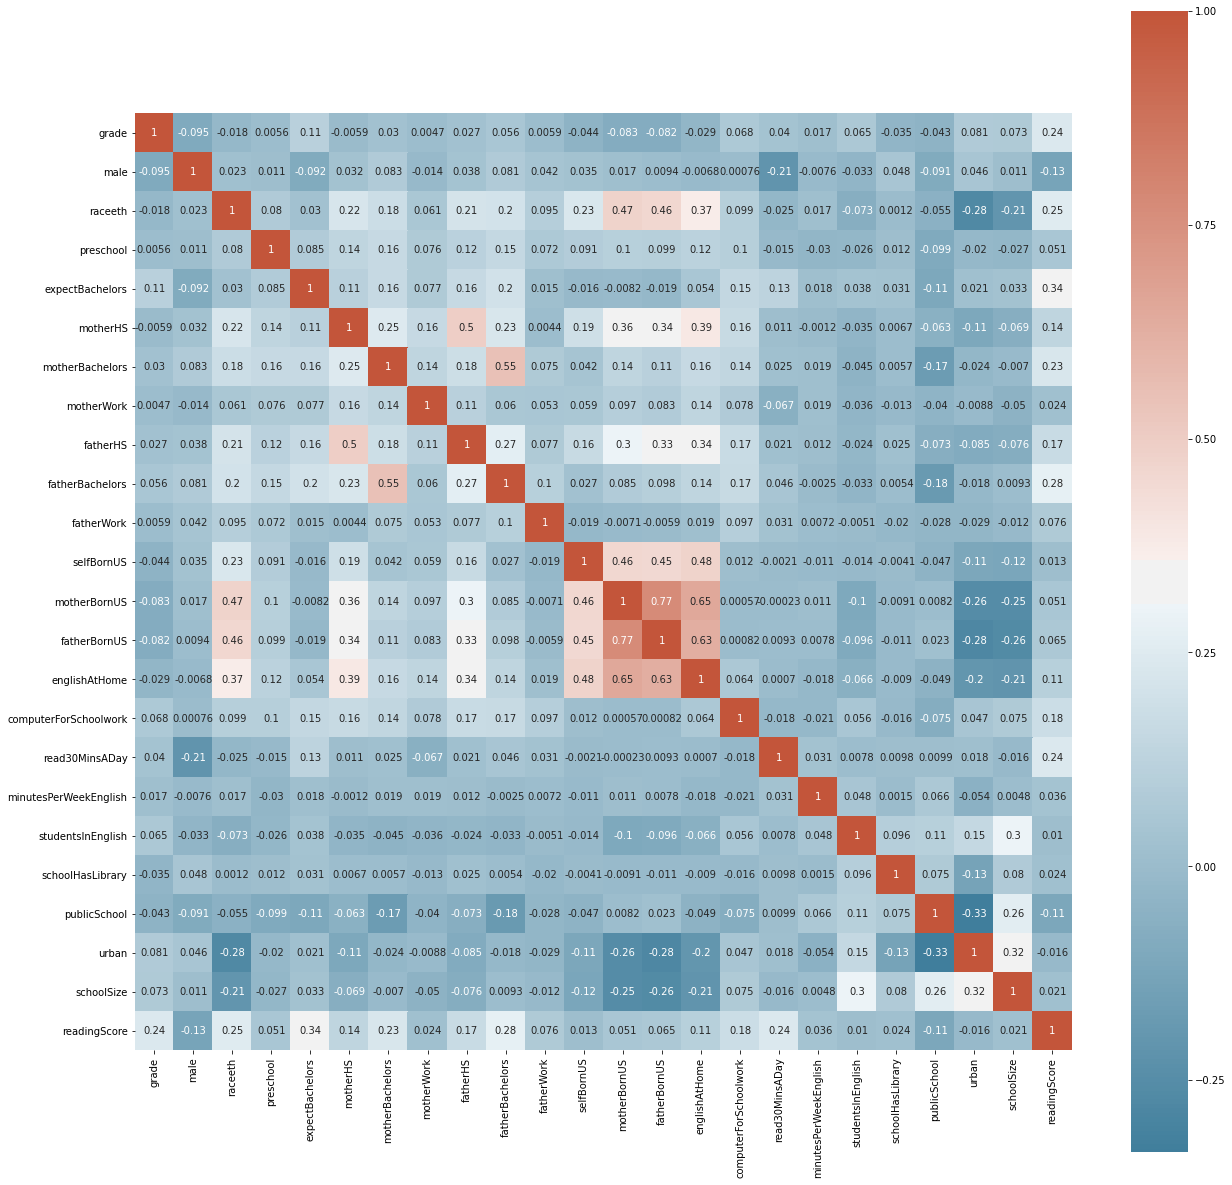

In [272]:
cmap = sns.diverging_palette(230, 20, as_cmap = True)
plt.subplots(figsize=(21,21))
sns.heatmap(pisaTrain.corr(), annot = True, cmap = cmap, square = True)

In [273]:
est3 = sm.OLS(y_test, X_test)

In [274]:
est4 = est3.fit()

In [275]:
print(est4.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              1631.
Date:                Sat, 20 Mar 2021   Prob (F-statistic):                        0.00
Time:                        00:45:06   Log-Likelihood:                         -5786.6
No. Observations:                 990   AIC:                                  1.162e+04
Df Residuals:                     967   BIC:                                  1.173e+04
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

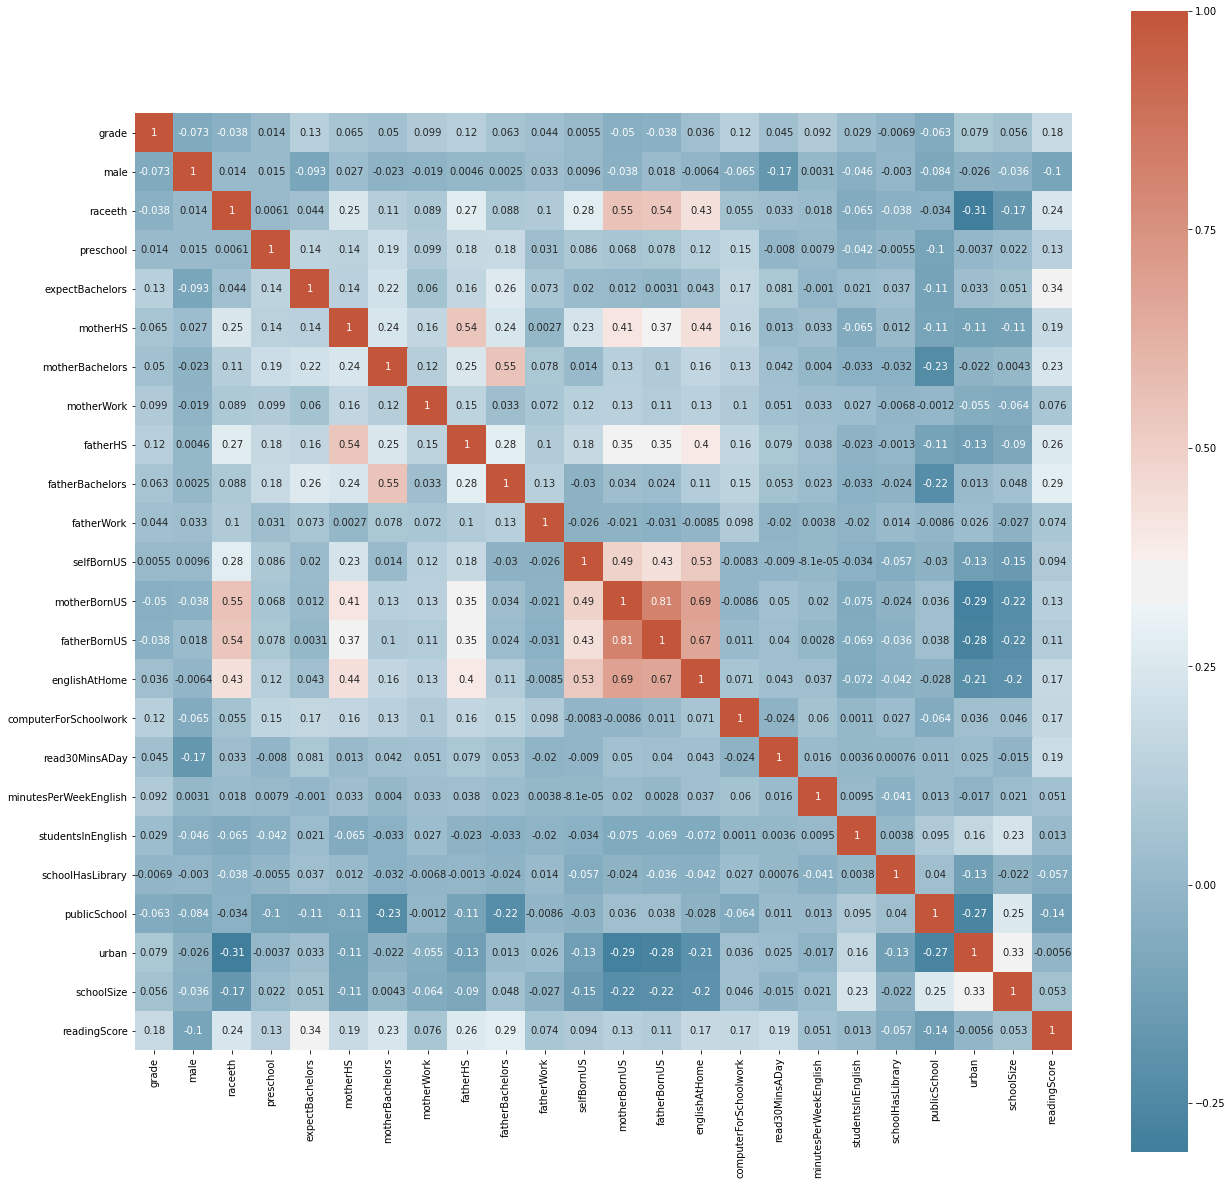

In [276]:
cmap = sns.diverging_palette(230, 20, as_cmap = True)
plt.subplots(figsize=(21,21))
sns.heatmap(pisaTest.corr(), annot = True, cmap = cmap, square = True)